# Stock correllation of nasdaq and AAPL
### This mini project is just calculating the risk aversion of an typical investor that might take depending on the returns
### for a very long time aapl was 1.5x the risk of whole market 
### depending on the 5 year check we did again on returns. today we can successfully confirm this. with a success rate of %71
### with slight drop in risk to 1.07x which says that it is very correlated with market

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
# we should only take the High
nasdaq = pd.read_csv("./NASDAQ.csv")
aapl = pd.read_csv("./AAPL.csv")
aapl.describe()
# nasdaq['Close'] and aapl['Close']

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,128.871608,130.327315,127.514644,128.992746,127.439168,9.890435e+07
std,44.759254,45.116379,44.390105,44.768389,45.083807,5.210126e+07
min,43.860001,44.480000,42.567501,43.325001,41.869556,2.404830e+07
25%,87.855625,88.731872,86.718124,87.954376,86.014095,6.535220e+07
50%,140.415001,142.735001,138.205001,140.865005,139.183517,8.609880e+07
75%,165.079998,166.989994,163.905003,165.345005,164.143566,1.156058e+08
max,198.020004,199.619995,197.000000,198.110001,197.857529,4.265100e+08


In [28]:
# ROC = (today - yesterday) / yesterday * 100
aapl_returns = []
nasdaq_returns = []
for i, v in aapl['Close'].items():
    if i != 0:
        # what is the change between today and yesterday
        daily_return = (aapl['Close'][i] - aapl['Close'][i - 1]) / aapl['Close'][i - 1] 
        aapl_returns.append(daily_return * 100)
        
for i, v in nasdaq['Close'].items():
    if i != 0:
        # what is the change between today and yesterday
        daily_return = (nasdaq['Close'][i] - nasdaq['Close'][i - 1]) / nasdaq['Close'][i - 1] 
        nasdaq_returns.append(daily_return * 100)
# create the dataframe
aapl_returns_df = pd.DataFrame(aapl_returns)
nasdaq_returns_df = pd.DataFrame(nasdaq_returns)
aapl_returns_df.describe()

,0
count,1257.000000
mean,0.123979
std,2.000620
min,-12.864695
25%,-0.842129
50%,0.092795
75%,1.229793
max,11.980826


In [29]:
X = pd.DataFrame(nasdaq_returns_df)
y = pd.DataFrame(aapl_returns_df)

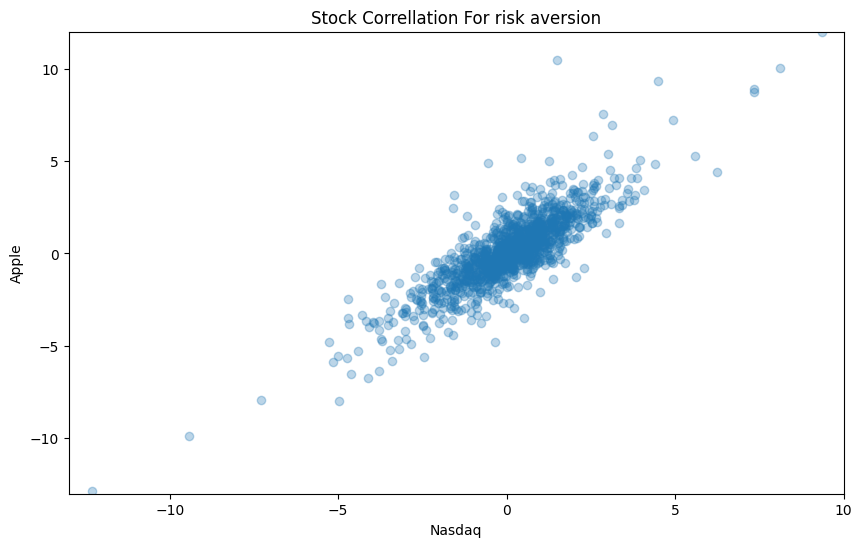

In [30]:
plt.figure(figsize=(10,6))
plt.title("Stock Correllation For risk aversion")
plt.xlabel("Nasdaq")
plt.ylabel("Apple")
plt.xlim(-13, 10)
plt.ylim(-13, 12)
plt.scatter(X, y, alpha=0.3)

In [31]:
regression = LinearRegression()

In [32]:
regression.fit(X, y)

LinearRegression()

In [33]:
regression.coef_ # Risk is 1.07x of aapl


array([[1.07145258]])

In [34]:
regression.intercept_ # 

array([0.04790742])

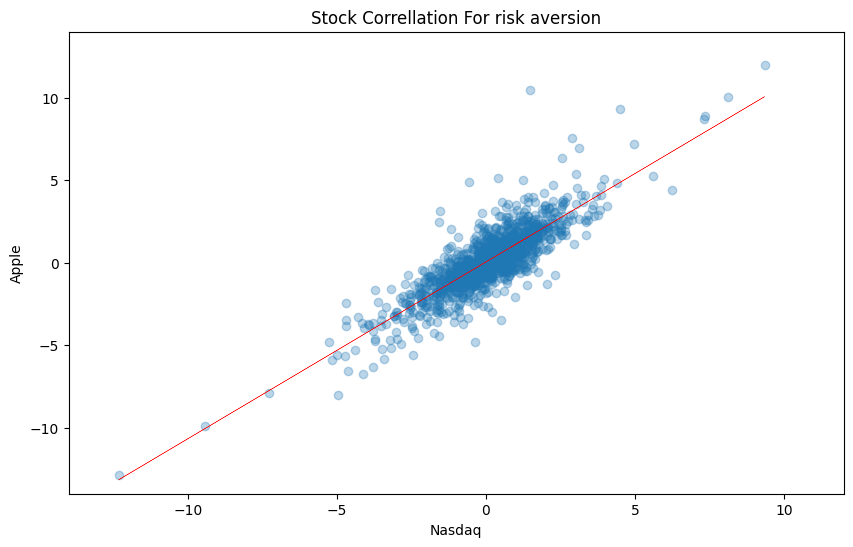

In [42]:
plt.figure(figsize=(10,6))
plt.title("Stock Correllation For risk aversion")
plt.xlabel("Nasdaq")
plt.ylabel("Apple")
plt.xlim(-14, 12)
plt.ylim(-14, 14)
plt.scatter(X, y, alpha=0.3)
plt.plot(X, regression.predict(X), color='red', linewidth=0.3)

In [43]:
regression.score(X, y) # Very good prediction %71 SCORE!

0.7188159127117347

In [45]:
regression.coef_  # aapl is 1.07x times related to market.

array([[1.07145258]])